## Анализ необходимого количества наблюдений, размера эффекта и мощности критериев с помощью *statsmodels.stats.power* (согласно подходу Fixed Horizon)

In [11]:
import math
import numpy as np
import statsmodels.stats.power as smp
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [12]:
# Критерий пропорций (нужен для кликов, конверсий)
alpha = 0.05
power = 0.9
n = 450
p_x = 0.5
p_y = 0.6

h = 2*math.asin(np.sqrt(p_x)) - 2*math.asin(np.sqrt(p_y))

In [13]:
h

-0.20135792079033066

In [14]:
# Какая мощность критерия будет в выборке из n наблюдений, 
# при условии, что величина эффекта = h c уровнем значимости alpha

power = smp.zt_ind_solve_power(effect_size=h, nobs1=n, alpha=alpha, alternative='two-sided')
power

0.8555200838742346

In [15]:
# Сколько наблюдений необходимо для заданного эффекта, чтобы
# результаты двухвыборочного теста пропорций были с заданным уровнем значимости 
# и заданной мощностью критерий (1 - вероятность ошибки II-го рода)

smp.zt_ind_solve_power(effect_size = h, alpha = alpha, power = power, alternative='two-sided')

449.9999999951084

In [16]:
# Какова величина эффекта будет при рассчете теста, при заранее заданных
# величинах альфа и величины мощности 
smp.zt_ind_solve_power(nobs1 = n, alpha = alpha, power = power)

0.20135582707747696

## t-Критерий Стьюдента (принцип такой же, какой и сверху)

In [17]:
effects = []
sample_sizes = []

for i in tqdm(range(50,2000)):
    effects.append(smp.tt_ind_solve_power(nobs1 = i, alpha = alpha, power = power))
    sample_sizes.append(i)

In [18]:
effects[:10]

[0.6100781117119797,
 0.6039473708160531,
 0.5979987726385927,
 0.592217508992714,
 0.5866052697062207,
 0.5811494490351803,
 0.5758429413270946,
 0.5706790950542528,
 0.5656516708182788,
 0.5607548033983814]

Text(0, 0.5, 'Effect Amount')

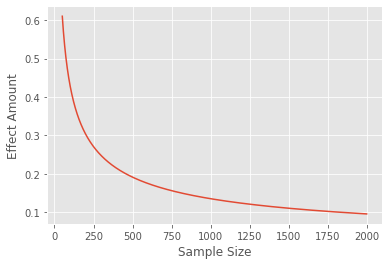

In [19]:
viz = sns.lineplot(x=sample_sizes, y=effects)
viz.set_xlabel("Sample Size")
viz.set_ylabel("Effect Amount")